# <center><font color = 'blue'>CAPSTONE 1</center>
# <center><font color = 'blue'>PRELIMINARY ANALYSIS OF ENVIRONMENTAL CONTROLS ON VEHICULAR ACCIDENTS IN THE U.S.A.</center>
## <center>Darwin Boardman</center>

### Study Time Range: February 2016 - March 2019
### State Focus: Texas
### Kaggle Dataset
### Sources: MapQuest and Bing

# <center><font color = 'red'>-----------------------------------------------------------------------------------------------------------------</center>

# Section 1: Explanation

### - This is a dataset of 2.25 million vehicular accidents in the U.S.A. It describes the location, time, environmental conditions (i.e. clear, rainy, etc), road infrasture (i.e. crossing, roundabout, etc), and severity (1-4). The time range of the dataset is between February 2016 and March 2019. <br> - The dataset was originally collected to determine if any patterns exist that could impact the outcome or quantity of accidents and potentially assign risks. <br> - While this dataset is broad and covers the entire U.S.A., the scope of the study will focus on variables surrounding date, time, weather, and severity of crashes in Texas. The analysis and findings are intended for the commuting population to aid them in lowering their travel risks.

### Important Note: The column labeled "Severity" does not directly reflect crash statistics like damage or injuries. Severity is referring to the impact on traffic delays, on a scale of 1 to 4 (low to high impact).

### Necessary Assumptions: This data does not include factors such as how crashes were reported, damage, injuries, causes, or emergency vehicle response time. Therefore, some interpretations must be made for this preliminary analysis. For example, if certain crashes have elevated severity from midnight to 3:00am, then it's possible that the crashes involved tired or inebriated drivers; or the response time could have been slower due to low visibility, tired emergency responders or towing services. 

# <center><font color = 'red'>-----------------------------------------------------------------------------------------------------------------</center>

# Section 2: Reading and Formatting the Dataframe

### First things first, the boring stuff!
### This section's workflow begins by importing the packages needed to read the file and then later, perform applicable analysis. Importing the required packages was a moving target based on common anticipation and also trying out new ideas, which didn't always work out. 
### After the file was read, the dataframe was sampled in a few different ways in order to determine if any columns and/or states should be filtered out. Ultimately, Texas, weather conditions, date, time, and severity were chosen for analysis. The dataframe was then modified, copied, and filtered down to the defined scope to limit noise and to make kernel processing quicker. 
### Initial dataframe (df) shape was about 2.25M rows by 49 columns.<br>The resulting dataframe (df_tx) is much smaller with about 237k rows by 41 columns. <br>That's about 92% reduction in size! The dataset remains large enough to identify statistical trends.

In [5]:
# Importing python packages

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pylab
import scipy
import datetime as dt
import statistics
%matplotlib inline

### Read file and examine data

In [6]:
# Read csv dataset
df = pd.read_csv('US_Accidents_May19.csv')

# There are 49 columns in the file. This option displays all columns.
# If there is an unknown amount of columns, then using a random large number like "999" will suffice.
pd.set_option('display.max_columns', 100)

In [7]:
# Confirm how many rows and columns exist in the dataframe.
df.shape

(2243939, 49)

In [8]:
# Common method to preview data. Display max columns was previously set to 100.
print(df.head())

    ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      NaN      NaN          0.01   
3  39.747753 -84.205582      NaN      NaN          0.01   
4  39.627781 -84.188354      NaN      NaN          0.01   

                                         Description  Number  \
0  Right lane blocked due to accident on I-70 Eas...     NaN   
1  Accident on Brice Rd at Tussing Rd. Exp

In [148]:
# Preview data with sample instead of head to view wider variability in data set.
# This method is rumored to have gained popularity as of recent.
df.sample(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Crash_Time,Crash_Cleared,Weather_Time,Crash_Time_Year,Crash_Time_Month,Crash_Time_Hour,Crash_Time_Day,Crash_Cleared_Year,Crash_Cleared_Month,Crash_Cleared_Hour,Weather_Time_Year,Weather_Time_Month,Weather_Time_Hour,Total_Crash_Time,Sum_Crash_Time_Minutes,Crash_Event
1038320,A-1038321,MapQuest,201.0,2,2018-07-25 07:58:02,2018-07-25 08:27:46,30.264015,-97.746765,NaN,NaN,0.00,Accident on Cesar Chavez St Eastbound at Lavac...,283.0,W Cesar Chavez St,L,Austin,Travis,TX,78701,US,US/Central,KATT,2018-07-25 07:51:00,81.0,NaN,77.0,30.02,9.0,Calm,NaN,NaN,Clear,True,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2018-07-25 07:58:02,2018-07-25 08:27:46,2018-07-25 07:51:00,2018,7,7,25,2018,7,8,2018.0,7.0,7.0,00:29:44,29,1
317854,A-317855,MapQuest,201.0,3,2017-02-02 09:33:10,2017-02-02 10:03:18,33.360947,-117.537498,NaN,NaN,0.01,Accident on I-5 Northbound in Camp Pendleton S...,NaN,I-5 N,R,San Clemente,San Diego,CA,92672,US,US/Pacific,KNXF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2017-02-02 09:33:10,2017-02-02 10:03:18,NaT,2017,2,9,2,2017,2,10,NaN,NaN,NaN,00:30:08,30,1
165108,A-165109,MapQuest,201.0,2,2016-08-24 16:42:07,2016-08-24 17:12:07,41.272022,-96.138794,NaN,NaN,0.00,Accident on 144th St Northbound at Hamilton St.,NaN,Hamilton St,R,Omaha,Douglas,NE,68154,US,US/Central,KMLE,2016-08-24 16:35:00,74.8,NaN,73.0,30.04,10.0,Calm,NaN,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-08-24 16:42:07,2016-08-24 17:12:07,2016-08-24 16:35:00,2016,8,16,24,2016,8,17,2016.0,8.0,16.0,00:30:00,30,1
662864,A-662865,MapQuest,201.0,2,2019-01-20 02:34:35,2019-01-20 03:04:05,34.019108,-117.480415,NaN,NaN,0.00,Middle lane blocked and right hand shoulder bl...,NaN,CA-60 E,R,Jurupa Valley,Riverside,CA,92509,US,US/Pacific,KRAL,2019-01-20 02:53:00,53.1,NaN,71.0,30.09,10.0,NE,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019-01-20 02:34:35,2019-01-20 03:04:05,2019-01-20 02:53:00,2019,1,2,20,2019,1,3,2019.0,1.0,2.0,00:29:30,29,1
1029447,A-1029448,MapQuest,201.0,2,2018-07-20 05:52:46,2018-07-20 06:37:32,30.025318,-82.350494,NaN,NaN,0.00,Lane blocked due to accident on FL-100 Main St...,993.0,W Main St,R,Lake Butler,Union,FL,32054-1043,US,US/Eastern,KLCQ,2018-07-20 05:55:00,73.4,NaN,100.0,29.93,7.0,SSE,4.6,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2018-07-20 05:52:46,2018-07-20 06:37:32,2018-07-20 05:55:00,2018,7,5,20,2018,7,6,2018.0,7.0,5.0,00:44:46,44,1


In [10]:
# Preview data types to determine if anything needs to be converted
# Hint: Start_Time and End_Time are identified as objects and should be datetimes.

df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

### Created new columns that resulted from converting "Start_Time" and "End_Time" columns from string to datetime data type. <br> Adding columns can help avoid potential future issues that can come from overriding original data. <br>Added new columns that broke out year, month, and hour to hopefully simplify workflows. <br>Created new "Crash_Event" column with a constant "1" to easily count events withtout dealing with unique IDs.

In [11]:
# Create new columns that parse out Year, Month, and Hour
# This will simplify future summary stats/graphs
df['Crash_Time'] = pd.to_datetime(df['Start_Time'])
df['Crash_Cleared'] = pd.to_datetime(df['End_Time'])
df['Weather_Time'] = pd.to_datetime(df['Weather_Timestamp'])


# Crash start date/time columns
df['Crash_Time_Year'] = pd.DatetimeIndex(df['Crash_Time']).year
df['Crash_Time_Month'] = pd.DatetimeIndex(df['Crash_Time']).month
df['Crash_Time_Hour'] = pd.DatetimeIndex(df['Crash_Time']).hour
df['Crash_Time_Day'] = pd.DatetimeIndex(df['Crash_Time']).day

# Crash cleared date/time columns
df['Crash_Cleared_Year'] = pd.DatetimeIndex(df['Crash_Cleared']).year
df['Crash_Cleared_Month'] = pd.DatetimeIndex(df['Crash_Cleared']).month
df['Crash_Cleared_Hour'] = pd.DatetimeIndex(df['Crash_Cleared']).hour

# Weather timestamp columns
# There are NaNs in this column, which means they cannot be converted to int64.
# This can be handled later if needed.
df['Weather_Time_Year'] = pd.DatetimeIndex(df['Weather_Time']).year
df['Weather_Time_Month'] = pd.DatetimeIndex(df['Weather_Time']).month
df['Weather_Time_Hour'] = pd.DatetimeIndex(df['Weather_Time']).hour

# Calculate total length of time for each crash 
df['Total_Crash_Time'] = df['Crash_Cleared'] - df['Crash_Time'] 
df['Sum_Crash_Time_Minutes'] = (df['Total_Crash_Time'].dt.seconds.div(60).astype(int) + df['Total_Crash_Time'].dt.days.multiply(1440).astype(int))
df['Sum_Crash_Time_Minutes'].round(3)

# Create a new column that records "1" for each crash so they can be added up later for frequency puposes.
df['Crash_Event'] = 1


In [12]:
#Confirmed changes from adding new columns.
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Crash_Time,Crash_Cleared,Weather_Time,Crash_Time_Year,Crash_Time_Month,Crash_Time_Hour,Crash_Time_Day,Crash_Cleared_Year,Crash_Cleared_Month,Crash_Cleared_Hour,Weather_Time_Year,Weather_Time_Month,Weather_Time_Hour,Total_Crash_Time,Sum_Crash_Time_Minutes,Crash_Event
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016-02-08 11:00:00,2016-02-08 05:58:00,2016,2,5,8,2016,2,11,2016.0,2.0,5.0,05:14:00,314,1
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016-02-08 06:37:59,2016-02-08 05:51:00,2016,2,6,8,2016,2,6,2016.0,2.0,5.0,00:30:00,30,1
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016-02-08 07:19:27,2016-02-08 06:56:00,2016,2,6,8,2016,2,7,2016.0,2.0,6.0,00:30:00,30,1
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016-02-08 07:53:34,2016-02-08 07:38:00,2016,2,7,8,2016,2,7,2016.0,2.0,7.0,00:30:00,30,1
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016-02-08 08:09:07,2016-02-08 07:53:00,2016,2,7,8,2016,2,8,2016.0,2.0,7.0,00:30:00,30,1


### Created new dataframe that is filtered to Texas crashes. Preserved integrity of original dataset. <br> Dropped several columns from new dataframe to filter down to defined scope of the project.

In [13]:
# Create new dataframe that is filtered to Texas
df_tx = df[df.State == 'TX']

# Confirm filter
df_tx.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Crash_Time,Crash_Cleared,Weather_Time,Crash_Time_Year,Crash_Time_Month,Crash_Time_Hour,Crash_Time_Day,Crash_Cleared_Year,Crash_Cleared_Month,Crash_Cleared_Hour,Weather_Time_Year,Weather_Time_Month,Weather_Time_Hour,Total_Crash_Time,Sum_Crash_Time_Minutes,Crash_Event
261008,A-261009,MapQuest,201.0,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,NaN,NaN,0.01,Accident on RM-2222 Northland Dr at Mo Pac Exp...,NaN,Mopac Expy S,R,Austin,Travis,TX,78731,US,US/Central,KATT,2016-11-30 15:51:00,66.0,NaN,24.0,30.01,10.0,NNW,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 16:03:54,2016-11-30 17:20:00,2016-11-30 15:51:00,2016,11,16,30,2016,11,17,2016.0,11.0,15.0,01:16:06,76,1
261009,A-261010,MapQuest,201.0,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,NaN,NaN,0.00,Accident on Grand Canyon Dr between Westheimer...,1128.0,E Saint Johns Ave,L,Austin,Travis,TX,78752-2826,US,US/Central,KATT,2016-11-30 16:51:00,62.1,NaN,25.0,30.03,10.0,North,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 16:32:18,2016-11-30 17:47:02,2016-11-30 16:51:00,2016,11,16,30,2016,11,17,2016.0,11.0,16.0,01:14:44,74,1
261010,A-261011,MapQuest,201.0,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,NaN,NaN,0.00,Accident on Saint Johns Ave at Cameron Rd.,7197.0,Cameron Rd,R,Austin,Travis,TX,78752,US,US/Central,KATT,2016-11-30 16:51:00,62.1,NaN,25.0,30.03,10.0,North,4.6,NaN,Clear,False,False,False,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day,2016-11-30 16:31:45,2016-11-30 17:46:34,2016-11-30 16:51:00,2016,11,16,30,2016,11,17,2016.0,11.0,16.0,01:14:49,74,1
261011,A-261012,MapQuest,201.0,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,NaN,NaN,0.01,#2 lane blocked and right hand shoulder blocke...,NaN,Hanger Cutoff Rd,R,Fort Worth,Tarrant,TX,76135,US,US/Central,KAWN,2016-11-30 16:00:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 16:06:49,2016-11-30 17:27:00,2016-11-30 16:00:00,2016,11,16,30,2016,11,17,2016.0,11.0,16.0,01:20:11,80,1
261012,A-261013,MapQuest,201.0,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,NaN,NaN,0.01,#2 lane blocked and right hand shoulder blocke...,NaN,I-820 N,R,Fort Worth,Tarrant,TX,76118,US,US/Central,KFWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-11-30 16:35:01,2016-11-30 17:49:39,NaT,2016,11,16,30,2016,11,17,NaN,NaN,NaN,01:14:38,74,1


In [14]:
# Made a list of columns to drop.
df_tx_list_drop = ['Amenity','Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Airport_Code']

In [15]:
# By referring to the above list, dropped the columns from df_tx.
df_tx.drop(df_tx_list_drop, axis=1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
# Confirmed changes.
df_tx.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crash_Time,Crash_Cleared,Weather_Time,Crash_Time_Year,Crash_Time_Month,Crash_Time_Hour,Crash_Time_Day,Crash_Cleared_Year,Crash_Cleared_Month,Crash_Cleared_Hour,Weather_Time_Year,Weather_Time_Month,Weather_Time_Hour,Total_Crash_Time,Sum_Crash_Time_Minutes,Crash_Event
261008,A-261009,MapQuest,201.0,2,2016-11-30 16:03:54,2016-11-30 17:20:00,NaN,Mopac Expy S,R,Austin,Travis,TX,78731,US,US/Central,2016-11-30 15:51:00,66.0,NaN,24.0,30.01,10.0,NNW,5.8,NaN,Clear,2016-11-30 16:03:54,2016-11-30 17:20:00,2016-11-30 15:51:00,2016,11,16,30,2016,11,17,2016.0,11.0,15.0,01:16:06,76,1
261009,A-261010,MapQuest,201.0,2,2016-11-30 16:32:18,2016-11-30 17:47:02,1128.0,E Saint Johns Ave,L,Austin,Travis,TX,78752-2826,US,US/Central,2016-11-30 16:51:00,62.1,NaN,25.0,30.03,10.0,North,4.6,NaN,Clear,2016-11-30 16:32:18,2016-11-30 17:47:02,2016-11-30 16:51:00,2016,11,16,30,2016,11,17,2016.0,11.0,16.0,01:14:44,74,1
261010,A-261011,MapQuest,201.0,2,2016-11-30 16:31:45,2016-11-30 17:46:34,7197.0,Cameron Rd,R,Austin,Travis,TX,78752,US,US/Central,2016-11-30 16:51:00,62.1,NaN,25.0,30.03,10.0,North,4.6,NaN,Clear,2016-11-30 16:31:45,2016-11-30 17:46:34,2016-11-30 16:51:00,2016,11,16,30,2016,11,17,2016.0,11.0,16.0,01:14:49,74,1
261011,A-261012,MapQuest,201.0,2,2016-11-30 16:06:49,2016-11-30 17:27:00,NaN,Hanger Cutoff Rd,R,Fort Worth,Tarrant,TX,76135,US,US/Central,2016-11-30 16:00:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,2016-11-30 16:06:49,2016-11-30 17:27:00,2016-11-30 16:00:00,2016,11,16,30,2016,11,17,2016.0,11.0,16.0,01:20:11,80,1
261012,A-261013,MapQuest,201.0,3,2016-11-30 16:35:01,2016-11-30 17:49:39,NaN,I-820 N,R,Fort Worth,Tarrant,TX,76118,US,US/Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-30 16:35:01,2016-11-30 17:49:39,NaT,2016,11,16,30,2016,11,17,NaN,NaN,NaN,01:14:38,74,1


In [17]:
# Confirm changes continuted
df_tx.shape

(237637, 41)

# <center><font color = 'red'>-----------------------------------------------------------------------------------------------------------------</center>

# Section 3: Exploring the Data

## First, I wanted to view the general stats of the numerical and object data separately to avoid clutter. For the most part, this data seems to be reasonable and organized. One observation to point out is with the "Totat_Crash_Time" (Crash_Cleared - Crash_Time) summary statistics. The minimum stat makes sense at 12 minutes but the maximum stat shows 234 days. The analysis didn't rely on this column so it was left as is. If this was the real world, then this outlier would be looked into further to determine scope of the issue and how to resolve it. 

In [18]:
df_tx.describe()

,TMC,Severity,Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Crash_Time_Year,Crash_Time_Month,Crash_Time_Hour,Crash_Time_Day,Crash_Cleared_Year,Crash_Cleared_Month,Crash_Cleared_Hour,Weather_Time_Year,Weather_Time_Month,Weather_Time_Hour,Total_Crash_Time,Sum_Crash_Time_Minutes,Crash_Event
count,202612.000000,237637.000000,94699.000000,231252.000000,16714.000000,231097.000000,231527.000000,230592.000000,200903.000000,20076.000000,237637.000000,237637.000000,237637.000000,237637.000000,237637.000000,237637.000000,237637.000000,232356.000000,232356.000000,232356.000000,237637,237637.000000,237637.0
mean,206.312943,2.292968,5280.098164,70.447892,33.248486,64.213958,30.030457,9.169470,9.044880,0.054897,2017.298144,6.722547,12.490012,15.680980,2017.298182,6.722998,13.238814,2017.297926,6.714976,12.220756,0 days 01:18:38.836603,78.132690,1.0
std,14.802871,0.480369,4549.701930,15.868399,8.165545,22.504121,0.217418,2.259194,4.432895,0.142377,0.884291,3.608160,4.854678,8.736422,0.884286,3.608263,5.113660,0.887687,3.622904,4.858657,0 days 12:59:03.842444,779.090311,0.0
min,200.000000,0.000000,1.000000,-40.000000,-65.900000,4.000000,0.290000,0.000000,1.200000,0.000000,2016.000000,1.000000,0.000000,1.000000,2016.000000,1.000000,0.000000,2016.000000,1.000000,0.000000,0 days 00:12:00,12.000000,1.0
25%,201.000000,2.000000,1599.000000,59.000000,29.200000,47.000000,29.910000,10.000000,5.800000,0.000000,2017.000000,3.000000,8.000000,8.000000,2017.000000,3.000000,9.000000,2017.000000,3.000000,8.000000,0 days 00:29:42,29.000000,1.0
50%,201.000000,2.000000,4062.000000,73.000000,35.200000,65.000000,30.010000,10.000000,8.100000,0.010000,2017.000000,7.000000,12.000000,15.000000,2017.000000,7.000000,13.000000,2017.000000,7.000000,12.000000,0 days 00:29:52,29.000000,1.0
75%,201.000000,3.000000,8148.500000,82.000000,39.300000,84.000000,30.140000,10.000000,11.500000,0.050000,2018.000000,10.000000,17.000000,23.000000,2018.000000,10.000000,17.000000,2018.000000,10.000000,16.000000,0 days 00:44:51,44.000000,1.0
max,406.000000,4.000000,51076.000000,161.600000,45.200000,100.000000,30.980000,111.000000,162.300000,2.940000,2019.000000,12.000000,23.000000,31.000000,2019.000000,12.000000,23.000000,2019.000000,12.000000,23.000000,234 days 00:00:00,336960.000000,1.0


In [19]:
df_tx.describe(include = 'object')

,ID,Source,Start_Time,End_Time,Street,Side,City,County,State,Zipcode,Country,Timezone,Weather_Timestamp,Wind_Direction,Weather_Condition
count,237637,237637,237637,237637,237637,237637,237637,237637,237637,237637,237637,237620,232356,232350,230450
unique,237637,3,232274,231733,15770,2,676,202,1,28364,1,2,84531,18,37
top,A-2164892,MapQuest,2018-05-31 11:41:47,2018-11-20 11:52:34,I-45 N,R,Houston,Harris,TX,75243,US,US/Central,2018-06-11 02:55:00,Calm,Clear
freq,1,201346,8,11,3953,188082,76418,80851,237637,2788,237637,230455,69,29518,76753


## Now the fun begins!!! Let's make some graphs.
## First, I wanted to plot frequency of crashes in bulk to see if there were any marcro trends up or down. There seems to be some slight cyclicity, which could be interesting to investigate further. However, we can't extrapolate much at this scale because we don't even have 3 full years' worth of data. <br>Next, I thought it would be useful to see if any variables contribute to frequency on more a micro scale.

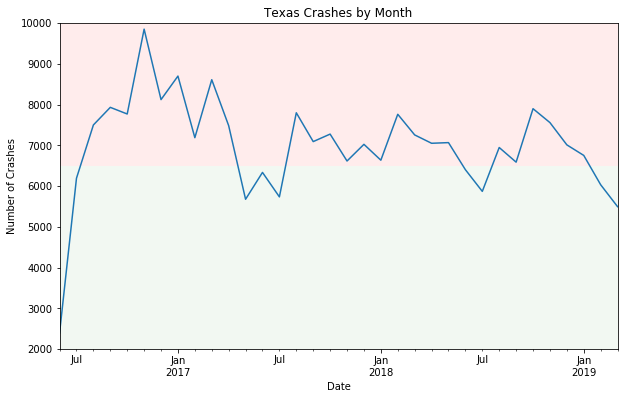

In [20]:
# Defined variables to plot
crashes = df_tx['Crash_Event']
crashes.index = df_tx['Crash_Time']

# Configured plot size to clearly observe trends.
plt.figure(figsize=(10, 6))
crashes.resample('m').count().plot()

# Added background colors to emphasize relative frequencies of crashes over time.
pylab.axhspan(0, 6500, facecolor='g', alpha=0.05) # green span
pylab.axhspan(6500, 10000, facecolor='r', alpha=0.075) # red span

# Limited plot scale to clean up the look.
pylab.ylim(2000, 10000)

# Added labels
pylab.xlabel('Date')
pylab.ylabel('Number of Crashes')
pylab.title('Texas Crashes by Month')

pylab.show()

In [21]:
# Printed sum of crashes by month, grouped by year and month.
print(df_tx.groupby(['Crash_Time_Year', 'Crash_Time_Month'])['Crash_Event'].count())

Crash_Time_Year  Crash_Time_Month
2016             6                   2399
                 7                   6194
                 8                   7500
                 9                   7932
                 10                  7769
                 11                  9850
                 12                  8122
2017             1                   8699
                 2                   7188
                 3                   8610
                 4                   7483
                 5                   5678
                 6                   6336
                 7                   5736
                 8                   7799
                 9                   7092
                 10                  7276
                 11                  6616
                 12                  7025
2018             1                   6636
                 2                   7762
                 3                   7256
                 4                   7051


## The next step was to look at monthly trends. Given what we know of weather patterns, some months tend to have more rain and snow than others. 

## The most common month for crashes was November. This could mean something but it really doesn't seem to be that much of an outlier. Remember that this data doesn't even cover 3 full years. If this fact isn't taken into account, then the interpreter can draw incorrect or misguided conclusions about crashes per month or even weather influences.

## If anything, the most interesting trend is how relatively few crashes happen between April and July. Could this be due to fewer students driving or summer vacations. We can't analytically prove anything because this dataset doesn't include those variables. 

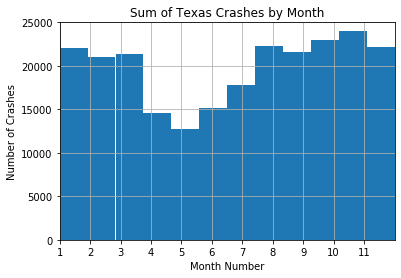

11 is the most common month for crashes. Why are months 4 through 7 so low?


In [22]:
df_tx.hist(column='Crash_Time_Month', bins = 12)
plt.xlim(1,12)
plt.xticks(range(1, 12))

plt.ylim(0, 25000)
plt.xlabel('Month Number')
plt.ylabel('Number of Crashes')
plt.title('Sum of Texas Crashes by Month')

plt.show()


print(str(statistics.mode(df_tx['Crash_Time_Month'])) + ' is the most common month for crashes. Why are months 4 through 7 so low?')

## Clearly, annual and monthly trends don't really seem to tell us much. Perhaps we should move to more grannular levels, such as daily.

## Are there any trends that can relate frequency of crashes and day of the month? 

## The next graph shows something interesting. We can see cyclic trends where the relatively higher frequencies occur in about 5 day increments and drop for just a 2 to 3 days in a row. This graph could suggest increased crashes during the weekdays vs weekends. However, the daily numbers weren't converted to actual days, like Monday or Saturday. This could be important to do in the future. 

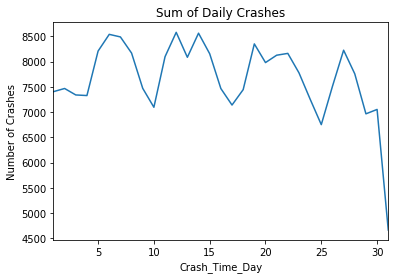

In [23]:
daily_crashes = df_tx.groupby('Crash_Time_Day')['Crash_Event'].count()

plt.xlabel('Days of the Month')
plt.ylabel('Number of Crashes')
plt.title('Sum of Daily Crashes')
daily_crashes.plot()

## Next, I was curious about weather conditions. 

## Are there any weather patterns that might closely relate to frequency or volume of crashes?

## Guess what... the most common weather condition in Texas was "clear". Now there's a real shocker! Based on Texas' weather patterns, it's no revelation that the amount of clear or overcast days outweigh those that have precipitation. The graph below displays the volume of crashes and the top 10 reported weather conditions. 

## It seems that simply looking at volume doesn't tell the whole story. Maybe we should dive into the weeds a bit to see more factors that might tell us more about the conditions of the crashes.

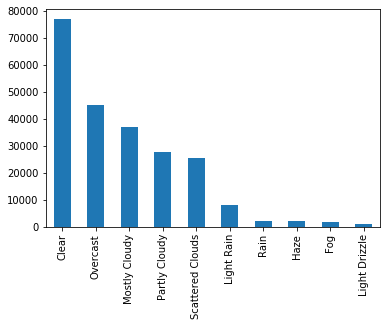

In [42]:
df_tx['Weather_Condition'].value_counts()[:10].plot(kind='bar')
plt.show()

## We've explored frequency of crashes in reference of dates and weather but this is only part of the story. Let's look at severity.

## Below, is a simple graph that displays the sums of each reported severity for context. 

## The majority of crashses are ranked as 2. 

## For the sake of discussion, I'm grouping ranks 3 and 4 together and considering them to be elevated severity events.

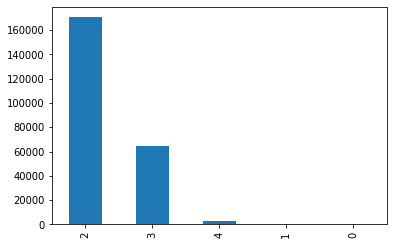

In [29]:
df_tx['Severity'].value_counts().plot(kind='bar')
plt.show()

In [149]:
# Counting each severity occurrance. 
df_tx.Severity.value_counts()

2    170484
3     64355
4      2689
1       105
0         4
Name: Severity, dtype: int64

# <center><font color = 'red'>-----------------------------------------------------------------------------------------------------------------</center>

# Section 4: Analytical Questions
## Each question is listed here and will be addressed, in order, further down. The answers to the questions will be colored <font color = 'blue'>blue <font color = 'black'>for convenience.

## <font color = 'blue'>1) Does the frequency of crashes have anything to do with time of day? If so, then what time(s) have the most crashes?
## <font color = 'blue'>2) How often is bad weather reported when crashes severely impact traffic?
## <font color = 'blue'>3) Are drivers more likely to be impacted by severe crashes during rush hour or outside of rush hour?

# <center><font color = 'red'>-----------------------------------------------------------------------------------------------------------------</center>

# Section 4 - Question 1
## The next histogram below reflects hourly crashes. It is clear that the morning commute time (7am - 10am) had the highest frequency of crashes. This was closely followed by the evening commute time (4pm - 6pm). Although cool to visualize, this is really a "duh" statement, hence the term "rush hour". Given what we know of the daily grind, rush hours tend to be packed with travelers and are generally associated with crashes, especially in metropolitan areas. However obvious, this graph does demonstrate reliability of the reported times in the data set. 

## Please review general summary stats below the histogram. For reference, the most common hour for crashes was 8am. 

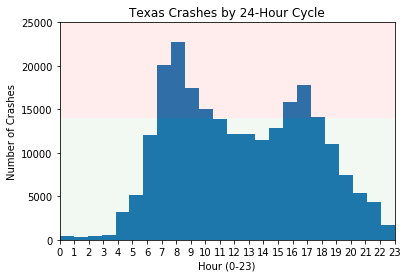

8 is the most common hour for crashes.
7666 is the average amount of crashes per day throughout this dataset.


In [44]:
# Make histogram
df_tx.hist(column='Crash_Time_Hour', bins = 24)

# Change background color based on y axis value.
pylab.axhspan(0, 14000, facecolor='g', alpha=0.05) # green span
pylab.axhspan(14000, 25000, facecolor='r', alpha=0.075) # red span

# Limit axis values for cleaner presentation
pylab.xlim(0, 23)
pylab.ylim(0, 25000)

# Edit axis labels
pylab.xticks(range(0, 24))
pylab.xlabel('Hour (0-23)')
pylab.ylabel('Number of Crashes')
pylab.title('Texas Crashes by 24-Hour Cycle')

# Take off grid to make the plot cleaner
pylab.grid(b=None) 

pylab.show()

# print general summary stats
print(str(statistics.mode(df_tx['Crash_Time_Hour'])) + 
      ' is the most common hour for crashes.')
print(str(round(df_tx.groupby('Crash_Time_Day')['Crash_Event'].count().mean())) + 
     ' is the average amount of crashes per day throughout this dataset.')

## From the histogram above, we can tell that the frequency is elevated during rush hours. 
## Performing the math below, the percentages of crashes that occur during morning and evening commutes were calculated. <br> I've grouped morning commute times adding hours 7-10 together and grouped evening commute times by adding 16-18 together.

# <font color = 'blue'>Answer to question 1:
## <font color = 'blue'>It appears there is a relationship between frequency of crashes and time of day. <br> 8:00am was reported to have the highest frequency of crashes.
## <font color = 'blue'>31.71% of all crashes occurred during morning rush hour and 20.09% occurred during the evening rush hour. <br> If we look at those percentages cumulatively, then this would suggest that about 51% of all crashes occurred within just 7 hours out of a 24 hour time frame. The remaining 49% of crashes is distributed among the other 17 hours of the day.

In [65]:
morning_commute = df_tx[df_tx['Crash_Time_Hour'].isin([7, 8, 9, 10])]
print(morning_commute.Crash_Time_Hour.value_counts())

evening_commute = df_tx[df_tx['Crash_Time_Hour'].isin([16, 17, 18])]
print(evening_commute.Crash_Time_Hour.value_counts())


sum_morn_comm = morning_commute.Crash_Time_Hour.count()
sum_eve_comm = evening_commute.Crash_Time_Hour.count()
sum_comm_crashes = sum_morn_comm + sum_eve_comm
print(sum_morn_comm)
print(sum_eve_comm)
print(sum_comm_crashes)


perc_crash_morn = (sum_morn_comm / tx_crashes) * 100
perc_crash_eve = (sum_eve_comm / tx_crashes) * 100

print(str(round(perc_crash_morn, 2)) + '% of crashes occur during morning rush hour.')
print(str(round(perc_crash_eve, 2)) + '% of crashes occur during the evening rush hour.')

8     22743
7     20055
9     17507
10    15044
Name: Crash_Time_Hour, dtype: int64
17    17813
16    15833
18    14100
Name: Crash_Time_Hour, dtype: int64
75349
47746
123095
31.71% of crashes occur during morning rush hour.
20.09% of crashes occur during the evening rush hour.


# <center><font color = 'red'>-----------------------------------------------------------------------------------------------------------------</center>

# Section 4 - Question 2
## Next, lets move on to severity vs weather. 

## In an earlier plot, we saw that the most common weather pattern to be reported during crashes was some variation of clear or cloudy. However, the graph below suggests that the inclimate weather patterns are more closely tied with crashes with elevated severity ratings.

## We can only hypothesize what contributes to this observation. Keep in mind that severity is a relationship based on traffic impact only. We have insufficient data (i.e. how many cars were involved, injuries, fatalities, response time, etc) to know exactly what's accounting for each crash. It's generally accepted that bad weather can bring about bad crashes but there isn't enough data to analytically test or demonstrate that concept.

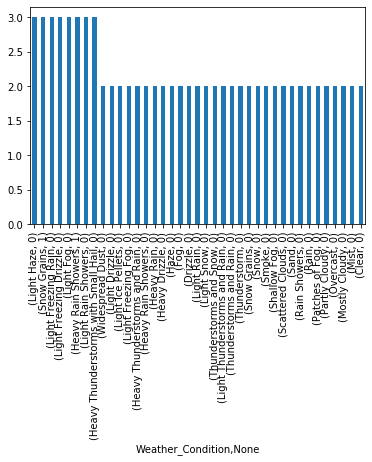

In [27]:
df_tx.groupby('Weather_Condition')['Severity'].apply(lambda x: x.mode()).sort_values(ascending = False).plot(kind = 'bar')

plt.show()

## We spent a minute on the graph of crash severity grouped on weather, so lets take a second to look at the distribution of the weather conditions to put things back into perspective. 

## The graph of the top 10 weather conditions can give the reader some idea of visual scope of common weather conditions during crashes, and listed below is the comprehensive list of sums for each. The bulk of the events occur with relatively calm skies and no precipitation. 

## "Light Haze" is the far left bar in the graph just above this text. One might think that this condition is very condusive to worse than average crashes. Look to the list below. "Light Haze" only has 3 entries. It doesn't take much to be the most common in only 3 events. Conversely, "Clear" has over 76,000 entries and its mode is 2 on the severity scale.

In [28]:
df_tx['Weather_Condition'].value_counts()

Clear                                  76753
Overcast                               45134
Mostly Cloudy                          36975
Partly Cloudy                          27697
Scattered Clouds                       25356
Light Rain                              8060
Rain                                    1960
Haze                                    1921
Fog                                     1680
Light Drizzle                           1059
Light Thunderstorms and Rain             831
Heavy Rain                               739
Thunderstorm                             585
Thunderstorms and Rain                   395
Heavy Thunderstorms and Rain             373
Mist                                     209
Drizzle                                  162
Shallow Fog                              105
Patches of Fog                           104
Light Snow                                97
Light Freezing Rain                       66
Widespread Dust                           61
Snow      

## So, let's move on to some percentages of events. 

In [31]:
# Total number of Texas crashes
tx_crashes = df_tx.Severity.count()
print(tx_crashes)

237637


## In order to calculate percentages with reference to elevated severity, we need to know what that sample looks like. We can't simply take the total crash number.
## Remember that I'm defining elevated severity by summing the rankings of 3 and 4 in the "Severity" column. 
## How many elevated severe crashes occurred in the dataset and what was that percentage? 

In [138]:
severe_crashes = df_tx[df_tx['Severity'].isin([3, 4])]
print(severe_crashes.Severity.value_counts())

sum_sev_crashes = severe_crashes.Severity.count()
print('The sum of crashes with elevated severity ranking was ' + str(sum_sev_crashes) + '.')

prob_elev_sev = (sum_sev_crashes / tx_crashes) * 100
print(str(round(prob_elev_sev, 2)) + '% of all crashes are considered to be elevated in the severity ranking.')

3    64355
4     2689
Name: Severity, dtype: int64
The sum of crashes with elevated severity ranking was 67044.
28.21% of all crashes are considered to be elevated in the severity ranking.


## Next step is to know how many crashes occured during inclimate weather conditions.
## I accomplished this by simply excluding the calm weather conditions from the total. 

In [139]:
# Made a variable that excludes relatively calm weather conditions in order to view only inclimate weather.
weather_events = df_tx[~df_tx['Weather_Condition'].isin(['Clear', 'Overcast', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'])]
print(weather_events.Weather_Condition.value_counts())

# Summed the variable "weather_events".
sum_inc_weather = weather_events.Weather_Condition.count()
print(str(sum_inc_weather) + ' is the sum of crashes during inclimate weather conditions.')

Light Rain                             8060
Rain                                   1960
Haze                                   1921
Fog                                    1680
Light Drizzle                          1059
Light Thunderstorms and Rain            831
Heavy Rain                              739
Thunderstorm                            585
Thunderstorms and Rain                  395
Heavy Thunderstorms and Rain            373
Mist                                    209
Drizzle                                 162
Shallow Fog                             105
Patches of Fog                          104
Light Snow                               97
Light Freezing Rain                      66
Widespread Dust                          61
Snow                                     26
Light Freezing Drizzle                   26
Sand                                     14
Light Ice Pellets                        13
Heavy Drizzle                            12
Smoke                           

In [48]:
# Calculated percent of inclimate weather crashes.
perc_inc_weather = sum_inc_weather / tx_crashes * 100
print(str(round(perc_inc_weather, 3)) + '% of all crashes happened during some form of inclimate weather.')

7.8% of all crashes happened during some form of inclimate weather.


# <font color = 'blue'>Answer to question 2:
## <font color = 'blue'>8,768 severe crashes occurred during inclimate weather. <br> 13.08% of all severe crashes occurred during inclimate weather events.<br> Light rain was the most common inclimate weather condition for severe crashes.

3    8446
4     322
Name: Severity, dtype: int64
8768 is the sum of severe crashes that occurred during inclimate weather.
13.08% of all severe crashes occurred during inclimate weather conditions.


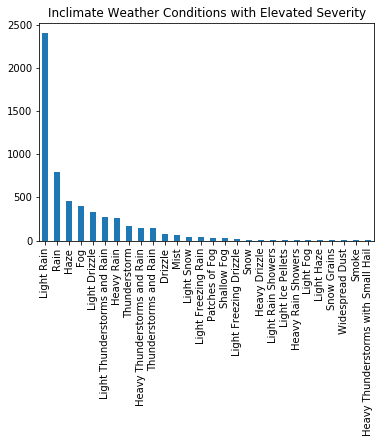

In [108]:
# Created variable that cross references inclimate weather and elevated severity.
sev_weather_crashes = df_tx[(~df_tx['Weather_Condition'].isin(['Clear', 'Overcast', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds']))&(df_tx['Severity'].isin([3, 4]))]
print(inc_weather_sev_crashes.Severity.value_counts())

sum_sev_weather_crashes = inc_weather_sev_crashes.Severity.count()
print(str(sum_sev_weather_crashes) + ' is the sum of severe crashes that occurred during inclimate weather.')

perc_sev_weather_crashes = (sum_sev_weather_crashes / sum_sev_crashes) * 100
print(str(round(perc_sev_weather_crashes, 2)) + '% of all severe crashes occurred during inclimate weather conditions.')

inc_weather_sev_crashes.Weather_Condition.value_counts().plot(kind='bar')
plt.title('Inclimate Weather Conditions with Elevated Severity')
plt.show()

# <center><font color = 'red'>-----------------------------------------------------------------------------------------------------------------</center>

# Section 4 - Question 3
## By this point, we've explored enough of the dataset to jump in to the answer. We can even use some of the information we've generated earlier.

# <font color = 'blue'>Answer to question 3:
## <font color = 'blue'>- 49.61% of all severe crashes occurred during rush hour. <br> - 5:00pm (hour 17) was the most common rush hour with severe crashes. <br> - On average, the rate of severe crashes that occur during rush hour is over 2 times more than the rate of severe crashes that occur outside of rush hour. <br> - This sounds like a broken record but don't forget that "Severity" is based on impact to traffic, not damage or injuries. However, we can make an interpretation that traffic is impacted more by crashes during rush hour than those that occur outside of rush hour. Simply reworded, crash impact on traffic (severity) may be correlated with the volume of drivers at a given time of day.

3    32377
4      886
Name: Severity, dtype: int64
33263 is the sum of severe crashes that occurred during rush hour.
49.61% of all severe crashes occurred during rush hour.


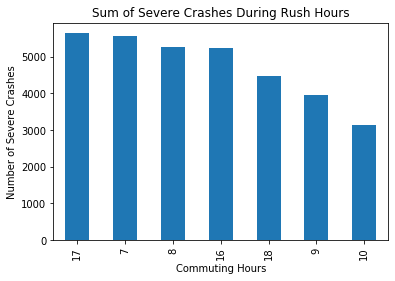

In [146]:
# How many severe crashes occurred during rush hour?
sev_comm_crashes = df_tx[(df_tx['Crash_Time_Hour'].isin([7,8,9,10,16,17,18]))&(df_tx['Severity'].isin([3, 4]))]
print(sev_comm_crashes.Severity.value_counts())

# Sum events.
sum_sev_comm_crashes = sev_comm_crashes.Severity.count()
print(str(sum_sev_comm_crashes) + ' is the sum of severe crashes that occurred during rush hour.')

# What percentage of crashes occurred during rush hour?
perc_sev_comm_crashes = (sum_sev_comm_crashes / sum_sev_crashes) * 100
print(str(round(perc_sev_comm_crashes, 2)) + '% of all severe crashes occurred during rush hour.')

# Plot
sev_comm_crashes.Crash_Time_Hour.value_counts().plot(kind='bar')
plt.xlabel('Commuting Hours')
plt.ylabel('Number of Severe Crashes')
plt.title('Sum of Severe Crashes During Rush Hours')
plt.show()

3    31978
4     1803
Name: Severity, dtype: int64
33781 is the sum of severe crashes that occurred outside of rush hour.
50.39% of all severe crashes occurred outside of rush hour.


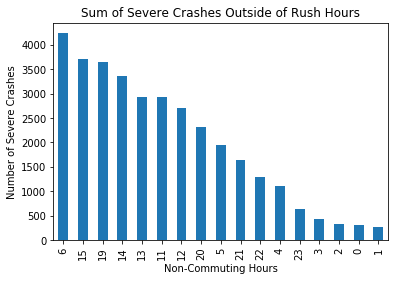

In [145]:
# How many severe crashes occurred outside of rush hour?
sev_not_comm_crashes = df_tx[~(df_tx['Crash_Time_Hour'].isin([7,8,9,10,16,17,18]))&(df_tx['Severity'].isin([3, 4]))]
print(sev_not_comm_crashes.Severity.value_counts())

# Sum events.
sum_sev_not_comm_crashes = sev_not_comm_crashes.Severity.count()
print(str(sum_sev_not_comm_crashes) + ' is the sum of severe crashes that occurred outside of rush hour.')

# What percentage of crashes occurred outside of rush hour?
perc_sev_not_comm_crashes = (sum_sev_not_comm_crashes / sum_sev_crashes) * 100
print(str(round(perc_sev_not_comm_crashes, 2)) + '% of all severe crashes occurred outside of rush hour.')

# Plot
sev_not_comm_crashes.Crash_Time_Hour.value_counts().plot(kind='bar')
plt.xlabel('Non-Commuting Hours')
plt.ylabel('Number of Severe Crashes')
plt.title('Sum of Severe Crashes Outside of Rush Hours')
plt.show()

In [140]:
# Rate of severe crashes per rush hour?
rate_sev_comm_crashes = sum_sev_comm_crashes / 7
print('On avereage, ' + str(round(rate_sev_comm_crashes, 2)) + ' crashes occur every rush hour.')

# Rate of severe crashes per non-rush hour?
rate_sev_not_comm_crashes = sum_sev_not_comm_crashes / 17
print('On avereage, ' + str(round(rate_sev_not_comm_crashes, 2)) + ' crashes occur every non-rush hour.')

# Ratio of severe crashes
print('The rate of severe crashes during rush hour is about ' + str(round(rate_sev_comm_crashes/rate_sev_not_comm_crashes, 2))
      + ' times more than those outside of rush hour.')

On avereage, 4751.86 crashes occur every rush hour.
On avereage, 1987.12 crashes occur every non-rush hour.
The rate of severe crashes during rush hour is about 2.39 times more than those outside of rush hour.


# <center><font color = 'red'>-----------------------------------------------------------------------------------------------------------------</center>

# Section 5: Conclusions/Future Proposed Work

## - It appears that inclimate weather events don't make up much of the crashes in general and only account for about 13% of severe impacts on traffic. <br> - Frequency of crashes seem to be elevated during week days and rush hours. <br> - About 51% of crashes occurred during the morning and evening commutes. <br> - Crashes that occurred during morning and evening rush hours had over twice the rate of severe impacts to traffic than crashes outside of rush hours.
## Bottom line, commuters should review weather and traffic conditions before getting on the road. If there's risk or evidence of slow downs, then it would be advised to research alternate routes and maybe adjust their schedules. The goal is to arrive safely at their destination on time. 

# Future Project Ideas: 
## The data would benefit from additional cleaning, like that example of "Total_Crash_Time" outliers at the beginning of this presentation. Converting day numbers to days of the week might benefit the study by filtering directly by non-holiday work days. <br> Analyzing cities or counties might bring out unique trends specific to those areas. <br> We could reintroduce all the columns and compare road infrastructure trends. 

## Thinking big picture, we could collect other information that might give more details behind each crash (wider timeframe, estimated vehicle population, damage, speed, type of collision, vehicles involved, injuries, etc...). Dealing with additional variables, simple analytics won't be the preferred method. A data scientist might choose to evaluate the data using multivariate models/machine learning algorithms to determine contributing factors and potentially provide predictions. These methods and models could ultimately be applied to the rest of the U.S.A.

# <center><font color = 'blue'>Thank you!</center>